In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Kickstarter.csv', encoding='latin1')

In [3]:
df

,name,category,deadline,goal,pledged,status,backers,Unnamed: 7
0,Safer Home,Hardware,3/7/2015 5:52,50000,0,failed,0,NaN
1,Gizbee Unlimited Removable Storage for Your T...,Gadgets,25/3/2016 19:30,87000,2030,canceled,15,NaN
2,Diposta - liberating people from their postal ...,Web,23/8/2016 13:18,100000,141,failed,3,NaN
3,Best Spray Bottle Ever - SureShot,Gadgets,7/3/2015 16:57,25000,3,failed,3,NaN
4,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,25/5/2015 20:04,50000,11336,canceled,19,NaN
...,...,...,...,...,...,...,...,...
26123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop('Unnamed: 7', axis=1)

In [5]:
df = df.dropna()

In [6]:
df.status.unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended',
       'undefined', '1', '130', '14159', '7492', '741'], dtype=object)

In [7]:
valid_statuses = ['failed', 'canceled', 'successful', 'live', 'suspended', 'undefined']
df = df[df.status.isin(valid_statuses)]

In [8]:
df.status.unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended',
       'undefined'], dtype=object)

In [9]:
df['backers '] = df['backers '].astype(int)
df['goal '] = df['goal '].astype(float) 
df['pledged '] = df['pledged '].astype(float)

In [10]:
df.to_csv('visualization.csv', index = False)

<AxesSubplot:ylabel='status'>

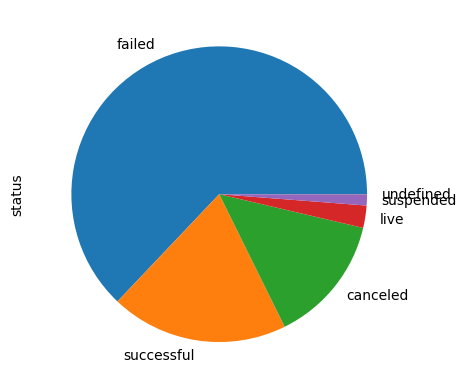

In [11]:
projState = df['status'].value_counts()

projState.plot(kind = 'pie')

<AxesSubplot:>

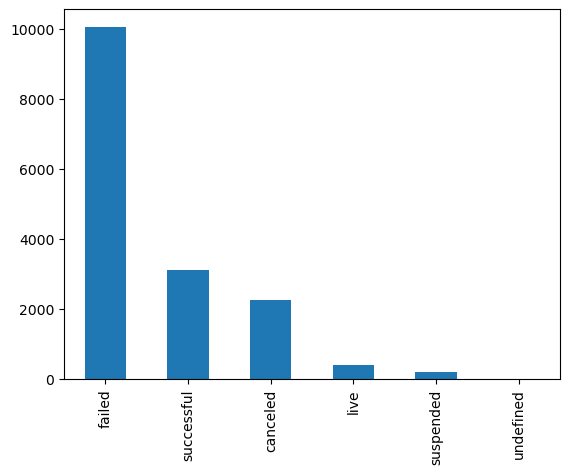

In [12]:
projState.plot(kind = 'bar')

<AxesSubplot:>

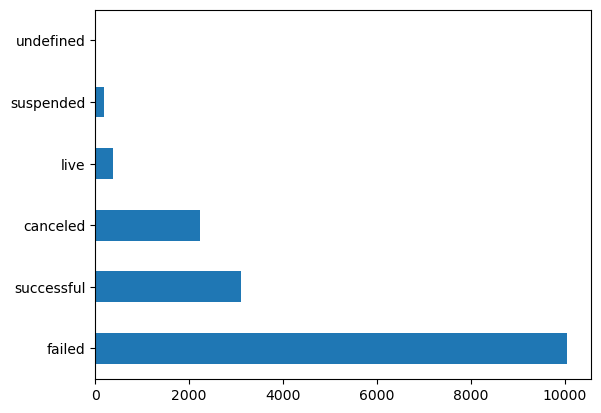

In [13]:
projState.plot(kind = 'barh')

In [14]:
df.columns

Index(['name ', 'category ', 'deadline ', 'goal ', 'pledged ', 'status',
       'backers '],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

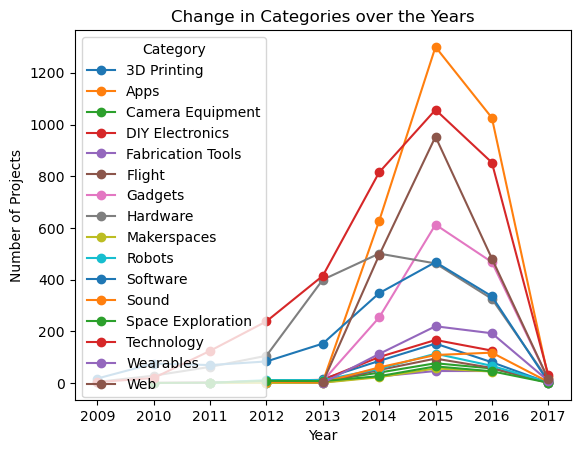

In [15]:
df['year'] = pd.to_datetime(df['deadline ']).dt.year
category_counts = df.groupby(['year', 'category ']).size().unstack()

# Increase the figure size
plt.figure(figsize=(10, 6))

category_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Change in Categories over the Years')
plt.legend(title='Category')
plt.show()

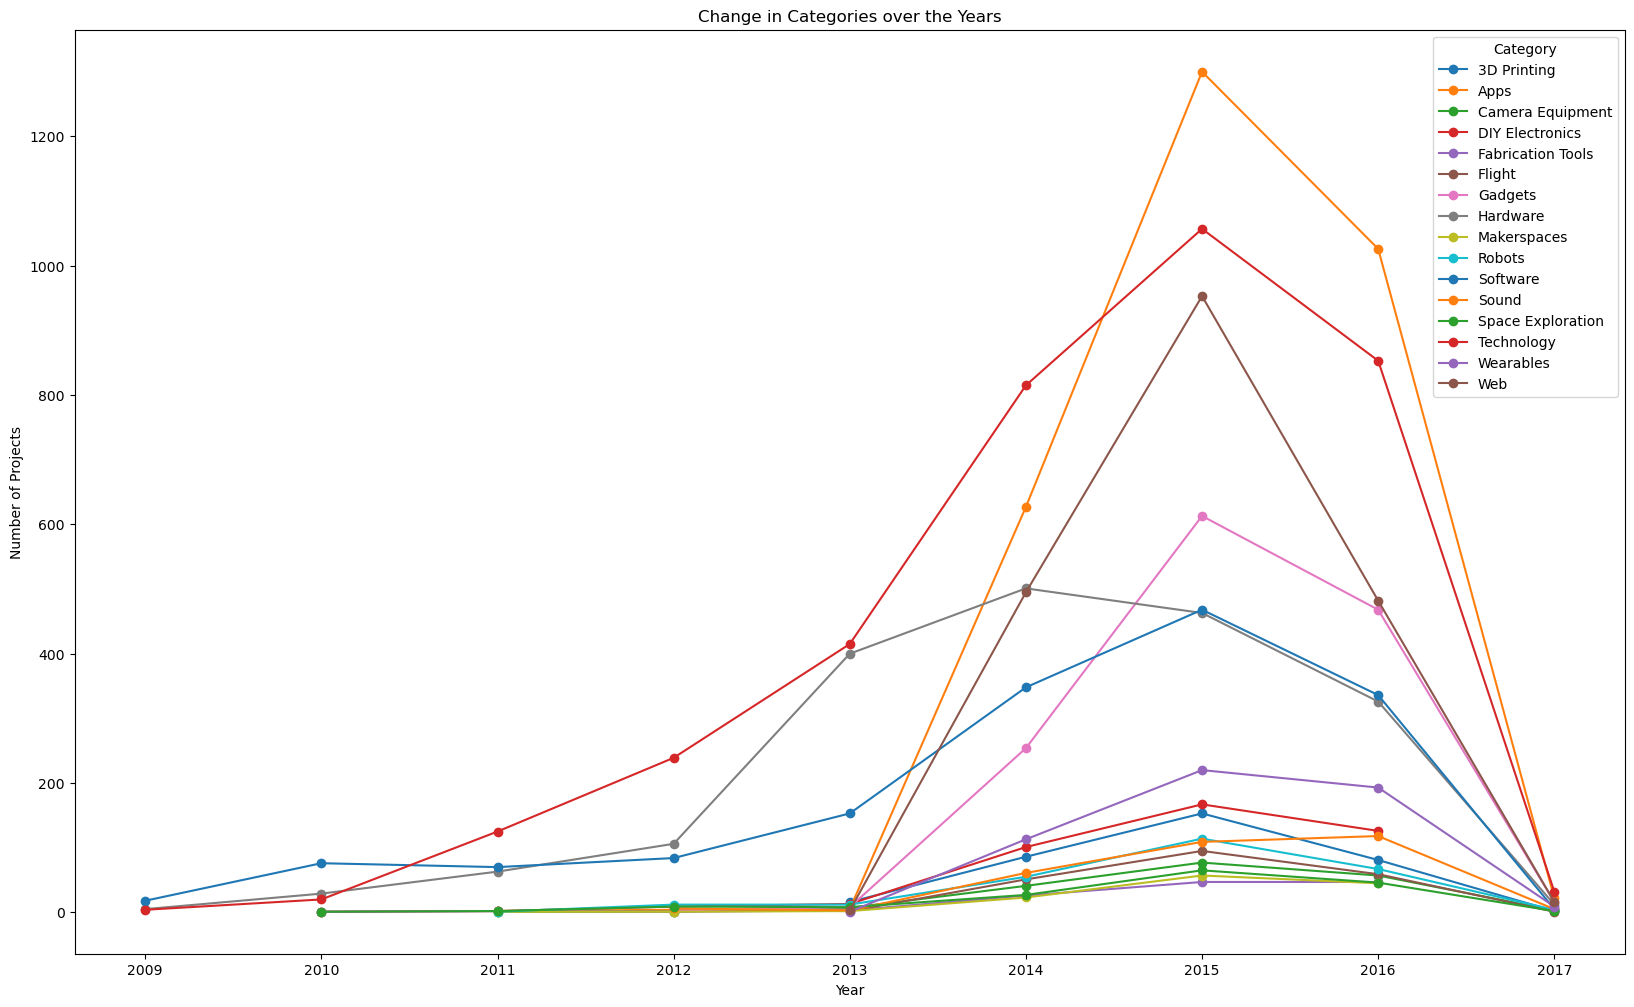

In [16]:
# Change in Categories over the Years
df['year'] = pd.to_datetime(df['deadline ']).dt.year
category_counts = df.groupby(['year', 'category ']).size().unstack()

# Create the figure and axes objects with the desired figsize
fig, ax = plt.subplots(figsize=(20, 12))

category_counts.plot(kind='line', marker='o', ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Change in Categories over the Years')
plt.legend(title='Category')
plt.show()

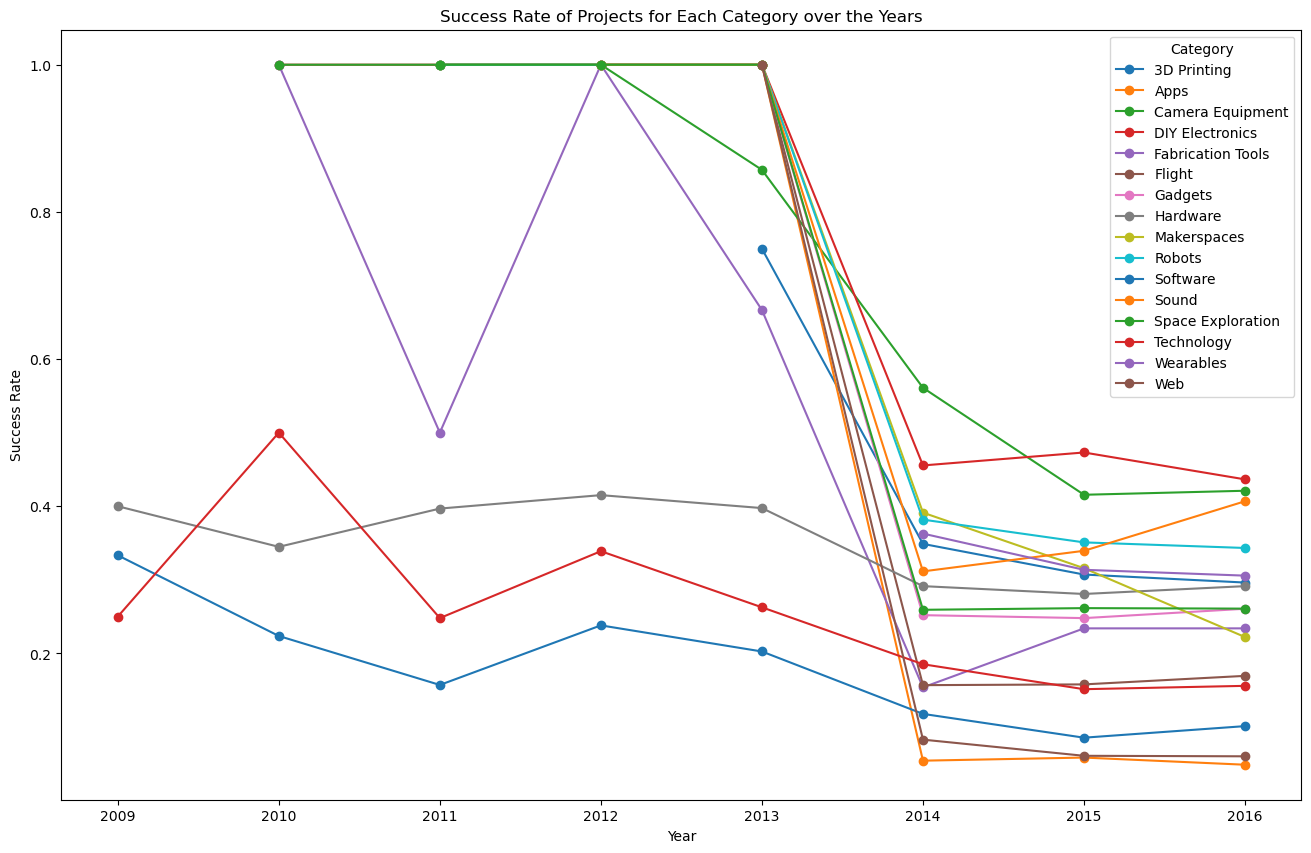

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the dataset loaded into a DataFrame called 'df'

# Success Rate of Projects for Each Category over the Years
success_df = df[df['status'] == 'successful']
success_counts = success_df.groupby(['year', 'category ']).size().unstack()
total_counts = df.groupby(['year', 'category ']).size().unstack()
success_rate = success_counts / total_counts

# Create the figure and axes objects with the desired figsize
fig, ax = plt.subplots(figsize=(16, 10))

# print(success_rate)

success_rate.to_csv('ques02.csv')

success_rate.plot(kind='line', marker='o', ax=ax)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate of Projects for Each Category over the Years')
plt.legend(title='Category')
plt.show()


In [18]:
df.dtypes

name          object
category      object
deadline      object
goal         float64
pledged      float64
status        object
backers        int32
year           int64
dtype: object

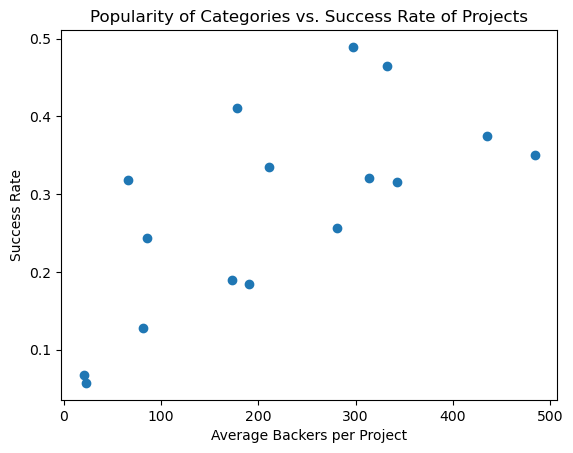

In [19]:
# Popularity of Categories (Average Backers per Project) against the Success Rate of Projects for Each Category
average_backers = df.groupby('category ')['backers '].mean()
# print(average_backers)
success_rate = success_df.groupby('category ').size() / df.groupby('category ').size()
# print(success_rate)
plt.scatter(average_backers, success_rate)
plt.xlabel('Average Backers per Project') 
plt.ylabel('Success Rate')
plt.title('Popularity of Categories vs. Success Rate of Projects')
plt.show()

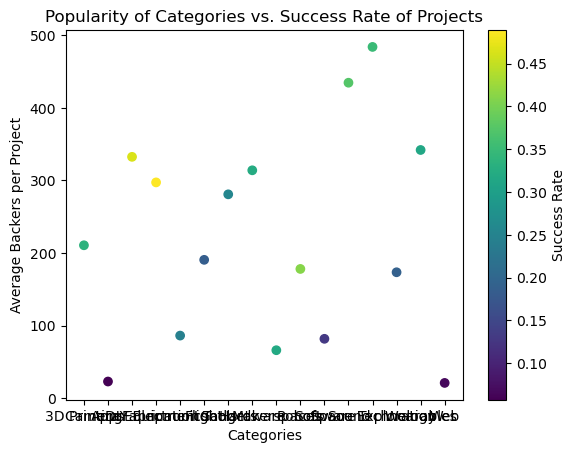

In [20]:
import matplotlib.pyplot as plt

average_backers = df.groupby('category ')['backers '].mean()
success_rate = success_df.groupby('category ').size() / df.groupby('category ').size()

# Create a DataFrame with the category, average backers, and success rate
data = pd.DataFrame({'Category ': average_backers.index, 'Average Backers per Project': average_backers.values, 'Success Rate': success_rate.values})

plt.scatter('Category ', 'Average Backers per Project', c='Success Rate', cmap='viridis', data=data)

# Annotate the points with category labels
# for category, x, y in zip(data['Category '], data['Category '], data['Average Backers per Project']):
#     plt.annotate(category, (x, y), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel('Categories')
plt.ylabel('Average Backers per Project')
plt.title('Popularity of Categories vs. Success Rate of Projects')
plt.colorbar(label='Success Rate')
plt.show()


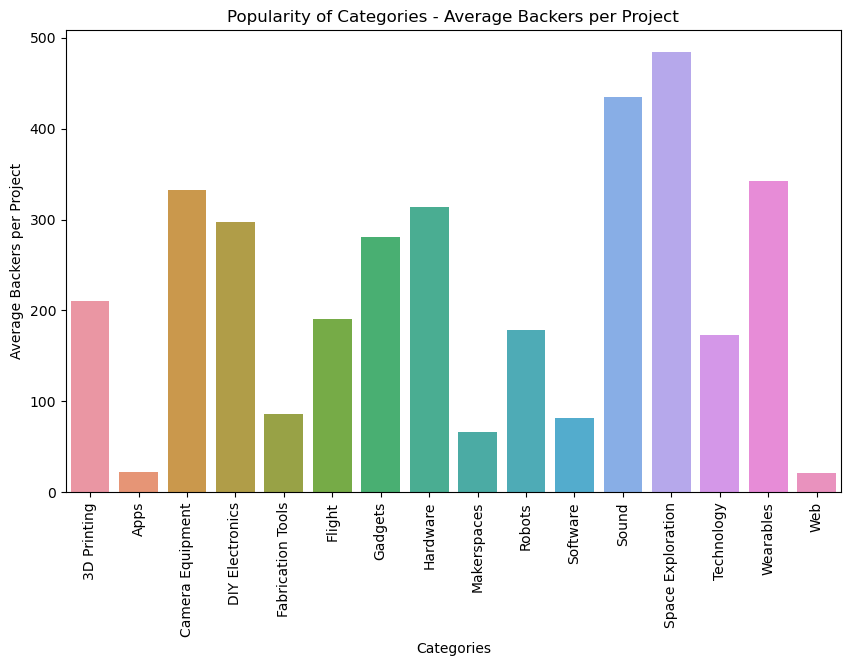

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

average_backers = df.groupby('category ')['backers '].mean()
success_rate = success_df.groupby('category ').size() / df.groupby('category ').size()

# Create a DataFrame with the category, average backers, and success rate
data = pd.DataFrame({'Category': average_backers.index, 'Average Backers per Project': average_backers.values, 'Success Rate': success_rate.values})

# Bar chart for average backers per project
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Backers per Project', data=data)
plt.xlabel('Categories')
plt.ylabel('Average Backers per Project')
plt.title('Popularity of Categories - Average Backers per Project')
plt.xticks(rotation=90)
plt.show()





# # Heatmap for success rate
# heatmap_data = data.pivot(index='Category', columns='Average Backers per Project', values='Success Rate')

# plt.figure(figsize=(10, 6))
# sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1%", cbar=True)
# plt.xlabel('Category')
# plt.ylabel('Category')
# plt.title('Success Rate of Projects - Category Comparison')

# plt.show()


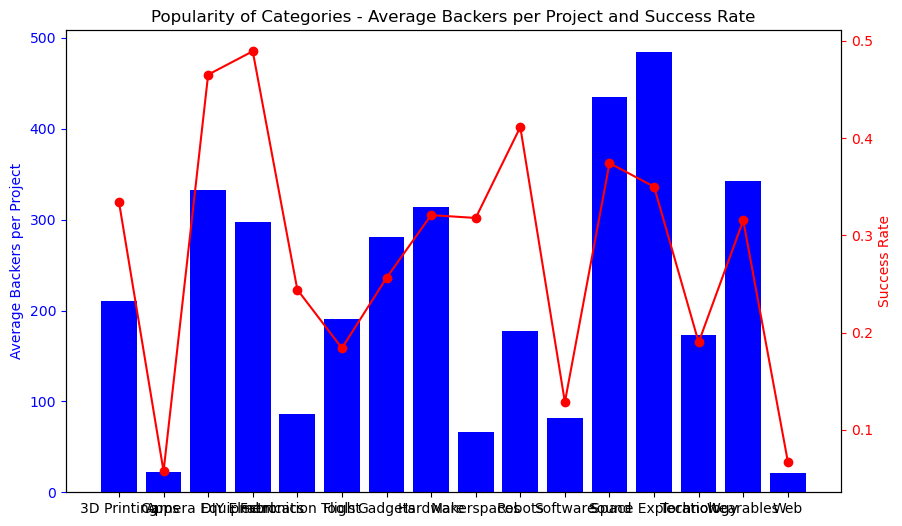

In [22]:
import matplotlib.pyplot as plt
import numpy as np

average_backers = df.groupby('category ')['backers '].mean()
success_rate = success_df.groupby('category ').size() / df.groupby('category ').size()

# Create a DataFrame with the category, average backers, and success rate
data = pd.DataFrame({'Category': average_backers.index, 'Average Backers per Project': average_backers.values, 'Success Rate': success_rate.values})

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average backers per project (bar chart)
ax1.bar(data['Category'], data['Average Backers per Project'], color='b')
ax1.set_ylabel('Average Backers per Project', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot success rate (line plot)
ax2.plot(data['Category'], data['Success Rate'], color='r', marker='o')
ax2.set_ylabel('Success Rate', color='r')
ax2.tick_params('y', colors='r')

# Set x-axis label and title
plt.xlabel('Categories')
plt.title('Popularity of Categories - Average Backers per Project and Success Rate')

# Rotate x-axis labels horizontally
plt.xticks(rotation=90)

plt.show()


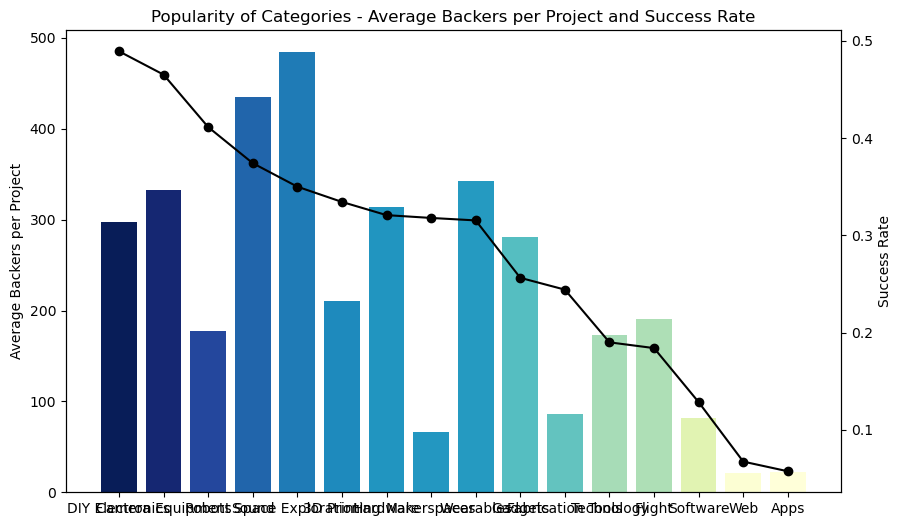

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average backers and success rate
average_backers = df.groupby('category ')['backers '].mean()
success_rate = success_df.groupby('category ').size() / df.groupby('category ').size()

# Create a DataFrame with the category, average backers, and success rate
data = pd.DataFrame({'Category': average_backers.index, 'Average Backers per Project': average_backers.values, 'Success Rate': success_rate.values})

data = data.sort_values('Success Rate', ascending=False)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a colormap
cmap = plt.get_cmap('YlGnBu')

# Normalize the success rate to match the colormap range
normalize = plt.Normalize(data['Success Rate'].min(), data['Success Rate'].max())
colors = cmap(normalize(data['Success Rate']))

# Plot average backers per project (bar chart)
ax1.bar(data['Category'], data['Average Backers per Project'], color=colors)
ax1.set_ylabel('Average Backers per Project')
ax1.tick_params('y')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot success rate (line plot)
ax2.plot(data['Category'], data['Success Rate'], color='black', marker='o')
ax2.set_ylabel('Success Rate')
ax2.tick_params('y')

# # Set colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
# sm.set_array([])
# cbar = plt.colorbar(sm)
# cbar.set_label('Success Rate')

# Set x-axis label and title
plt.xlabel('Categories')
plt.title('Popularity of Categories - Average Backers per Project and Success Rate')

# Rotate x-axis labels horizontally
plt.xticks(rotation=90, ha='center')

plt.show()

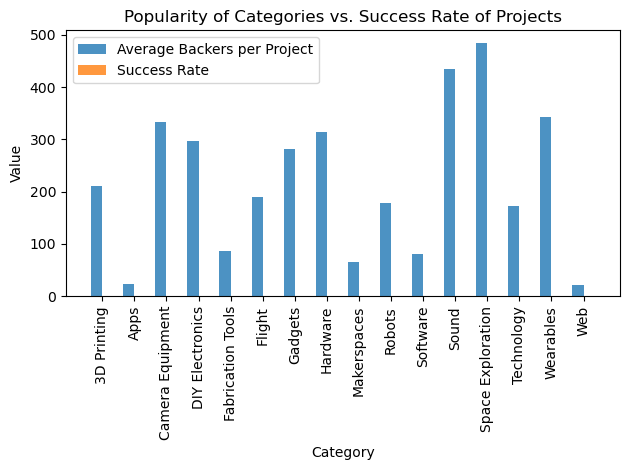

In [21]:
x = range(len(average_backers))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(x, average_backers, bar_width, alpha=opacity, label='Average Backers per Project')
rects2 = plt.bar([i + bar_width for i in x], success_rate, bar_width, alpha=opacity, label='Success Rate')

plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Popularity of Categories vs. Success Rate of Projects')
plt.xticks([i + bar_width/2 for i in x], average_backers.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
df.columns

Index(['name ', 'category ', 'deadline ', 'goal ', 'pledged ', 'status',
       'backers ', 'year'],
      dtype='object')

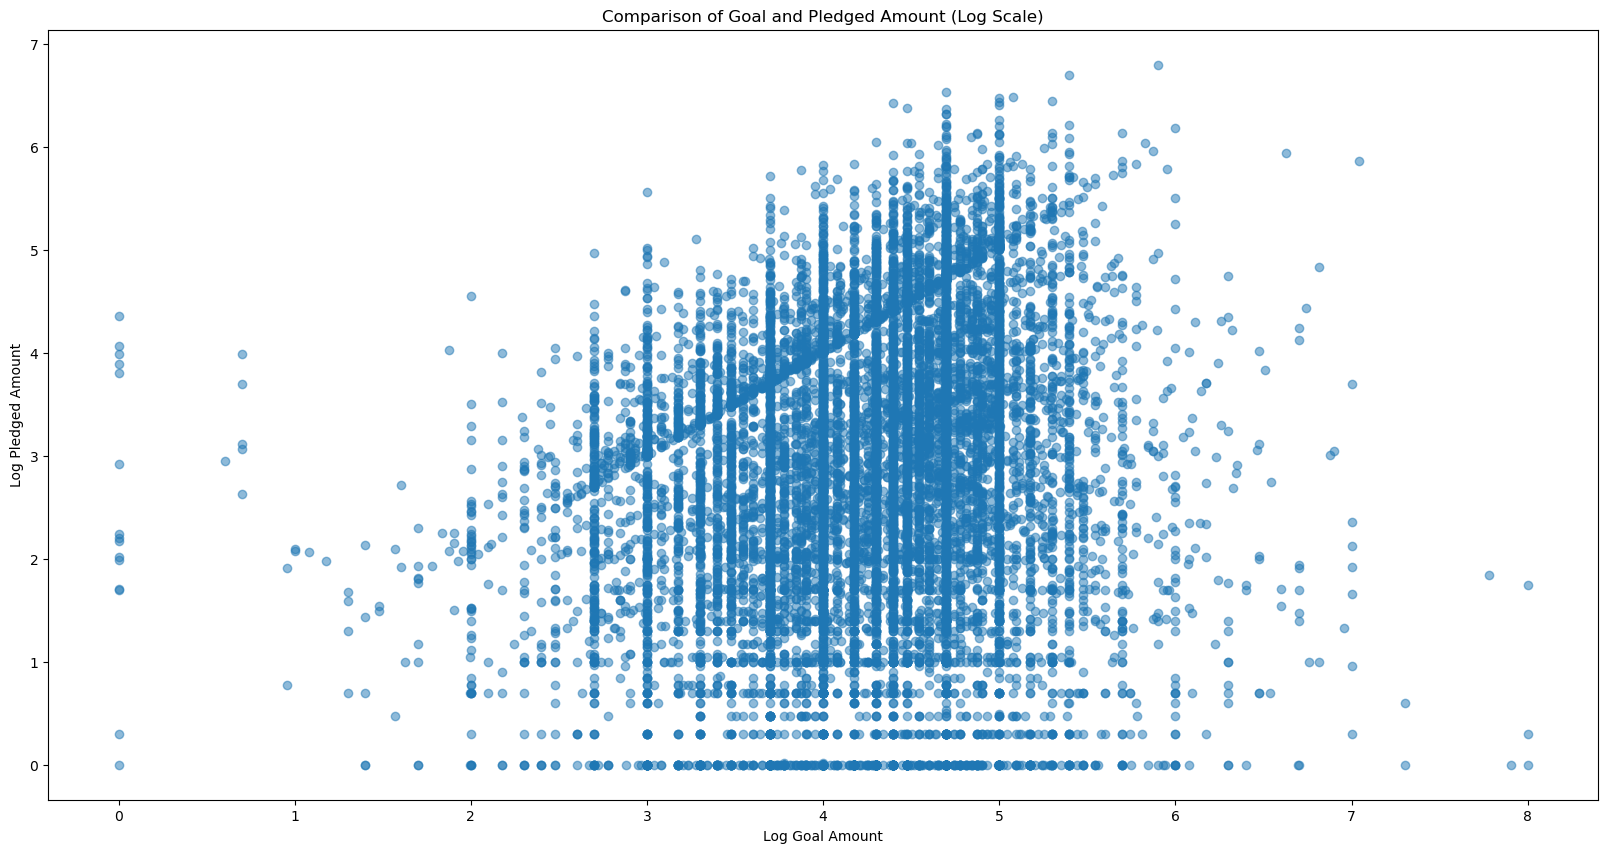

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting the goal and pledged amounts
goal_amounts = df['goal ']
pledged_amounts = df['pledged ']

# Setting the size of the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Creating the scatter plot with logarithmic scale and customized marker size
ax.scatter(np.log10(goal_amounts), np.log10(pledged_amounts), alpha=0.5)

# Adding labels and title
ax.set_xlabel('Log Goal Amount')
ax.set_ylabel('Log Pledged Amount')
ax.set_title('Comparison of Goal and Pledged Amount (Log Scale)')

# Displaying the plot
plt.show()


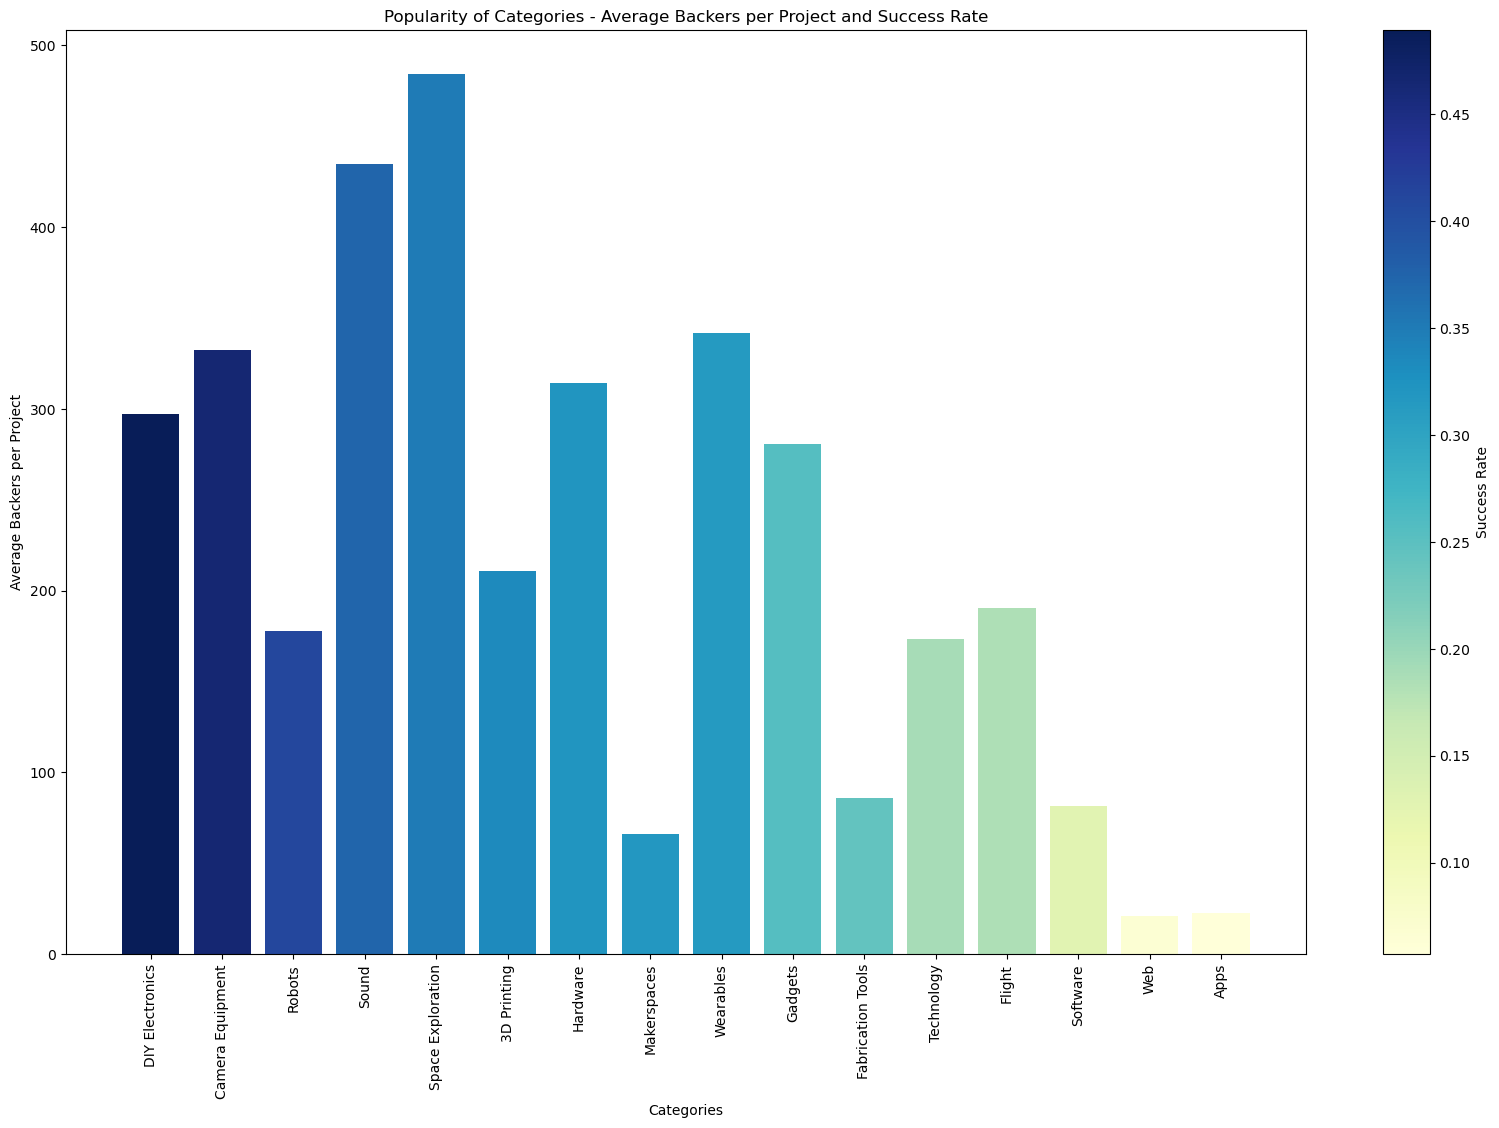

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average backers and success rate
average_backers = df.groupby('category ')['backers '].mean()
success_rate = success_df.groupby('category ').size() / df.groupby('category ').size()

# Create a DataFrame with the category, average backers, and success rate
data = pd.DataFrame({'Category': average_backers.index, 'Average Backers per Project': average_backers.values, 'Success Rate': success_rate.values})

# Sort the data by success rate in descending order
data = data.sort_values('Success Rate', ascending=False)

data.to_csv('ques03.csv', index=False)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(20, 12))

# Define a colormap
cmap = plt.get_cmap('YlGnBu')

# Normalize the success rate to match the colormap range
normalize = plt.Normalize(data['Success Rate'].min(), data['Success Rate'].max())
colors = cmap(normalize(data['Success Rate']))

# Plot average backers per project (bar chart)
ax1.bar(data['Category'], data['Average Backers per Project'], color=colors)
ax1.set_ylabel('Average Backers per Project')
ax1.tick_params('y')

# ax2 = ax1.twinx()

# Plot success rate (line plot)
# ax2.plot(data['Category'], data['Success Rate'], color='black', marker='o')
# ax2.set_ylabel('Success Rate')
# ax2.tick_params('y')

# Set colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Success Rate')

# Set x-axis label and title
plt.xlabel('Categories')
plt.title('Popularity of Categories - Average Backers per Project and Success Rate')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

plt.show()


             Category  average_goal  average_pledged
0         3D Printing  4.050387e+04     53498.815000
1                Apps  9.383683e+04      1609.996517
2    Camera Equipment  4.518322e+04     77104.366203
3     DIY Electronics  3.571032e+04     27603.721408
4   Fabrication Tools  8.023463e+04     44610.117638
5              Flight  1.734783e+05     28041.681557
6             Gadgets  5.907527e+04     27831.403488
7            Hardware  9.273799e+04     43295.317097
8         Makerspaces  2.164103e+05      7666.562636
9              Robots  3.518467e+05     30032.477962
10           Software  1.104630e+05      4335.933196
11              Sound  5.036962e+04     85680.731126
12  Space Exploration  1.079591e+06     33900.604437
13         Technology  1.563906e+05     19774.555666
14          Wearables  5.600707e+04     45537.290299
15                Web  1.161130e+05      1560.111380


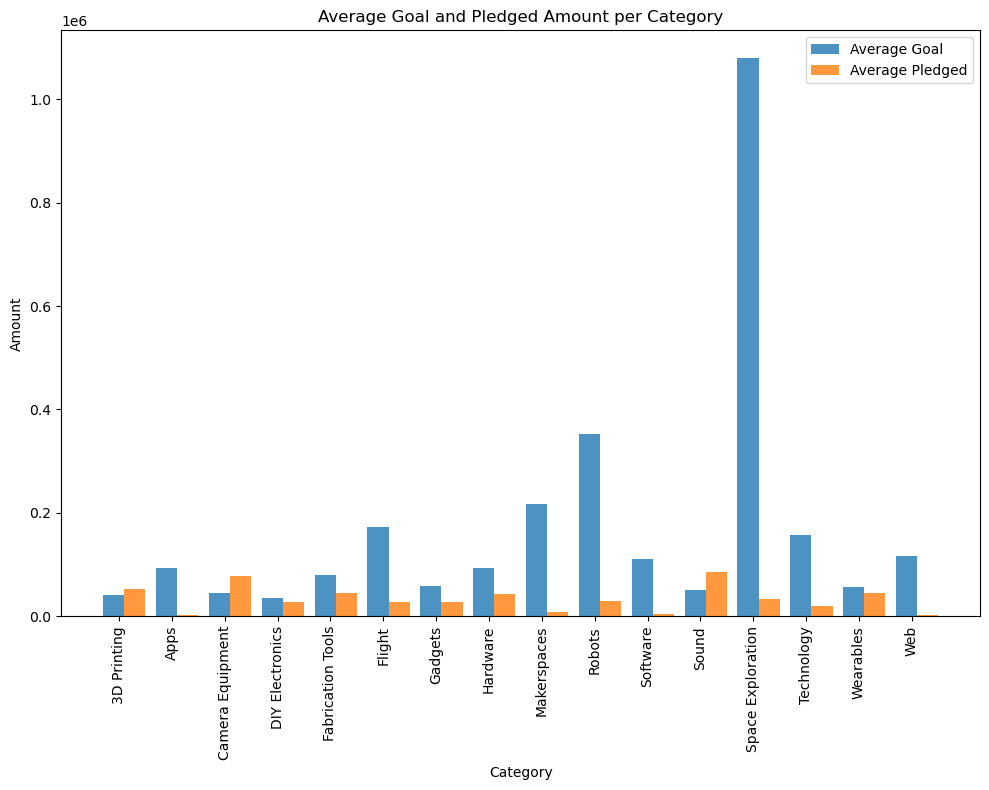

In [37]:
# Calculating average goal and pledged amounts for each category
average_goal = df.groupby('category ')['goal '].mean()
average_pledged = df.groupby('category ')['pledged '].mean()

data = pd.DataFrame({'Category': average_goal.index, 'average_goal': average_goal.values, 'average_pledged': average_pledged.values})

print(data)
data.to_csv('ques04.csv', index=False)

# Plotting the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 8))
x = range(len(average_goal))
bar_width = 0.4
opacity = 0.8

rects1 = ax.bar(x, average_goal, bar_width, alpha=opacity, label='Average Goal')
rects2 = ax.bar([i + bar_width for i in x], average_pledged, bar_width, alpha=opacity, label='Average Pledged')

ax.set_xlabel('Category')
ax.set_ylabel('Amount')
ax.set_title('Average Goal and Pledged Amount per Category')
ax.set_xticks([i + bar_width/4 for i in x])
ax.set_xticklabels(average_goal.index, rotation=90)  # Set rotation to 90 degrees for horizontal labels
ax.legend()

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

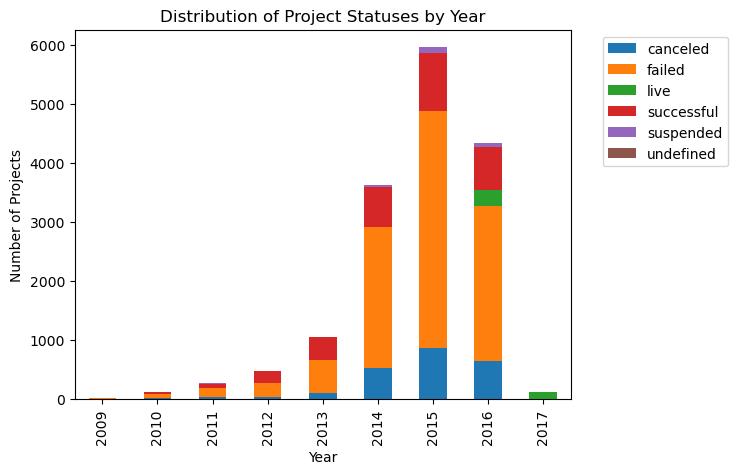

In [26]:
# Create a pivot table to count the number of projects for each status and year
status_counts = df.pivot_table(index='year', columns='status', values='goal ', aggfunc='count', fill_value=0)

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Distribution of Project Statuses by Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
# ds.plot(x = 'deadline', y = 'goal', kind = 'scatter')

In [28]:
# df.plot(kind = 'bar')

In [29]:
# df.hist(column = 'goal')